In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import random
import math

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import copy
x_tmp = copy.deepcopy(x_test[0])

2


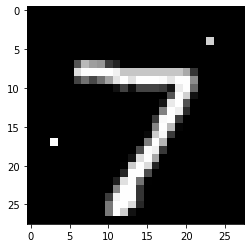

5


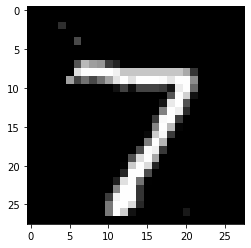

2


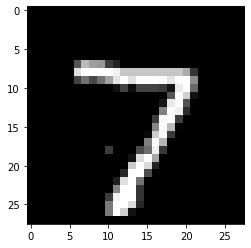

3


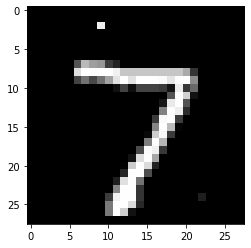

3


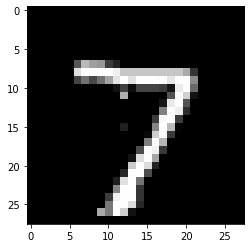

1


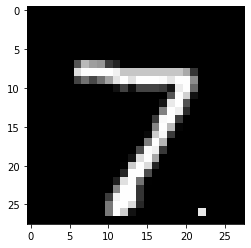

4


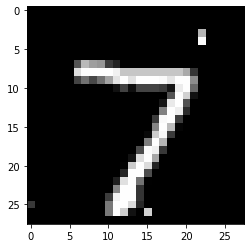

5


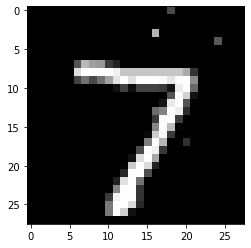

1


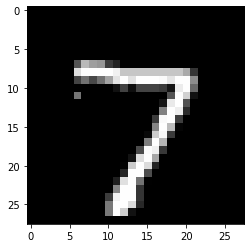

2


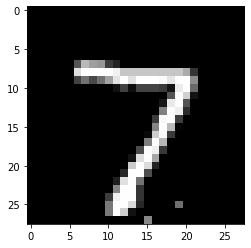

1


5


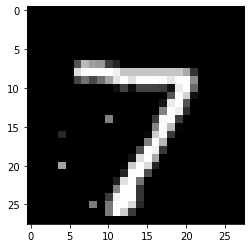

5


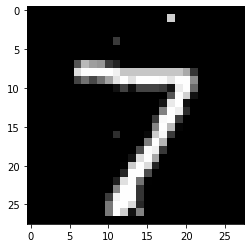

3


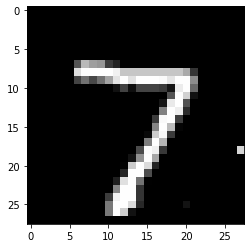

2


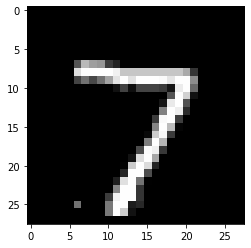

5


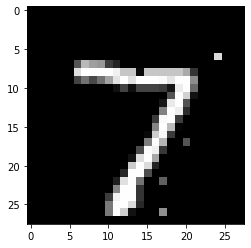

4


2


1


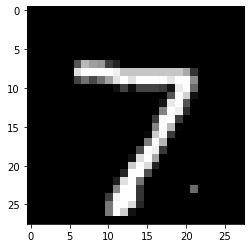

5


2


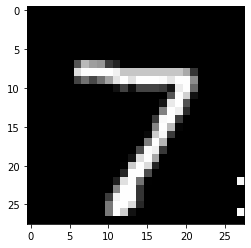

5


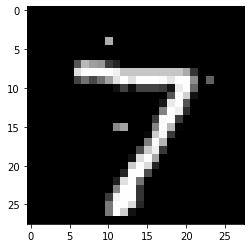

1


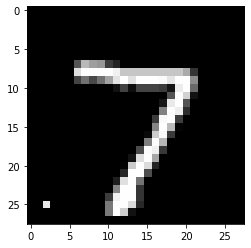

1


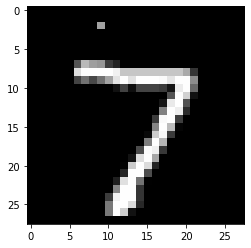

2


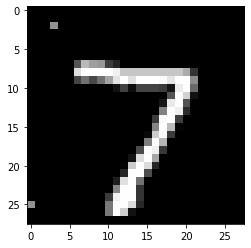

1


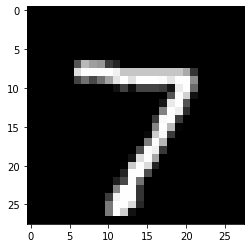

2


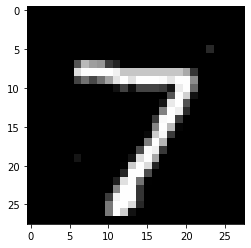

5


1


3


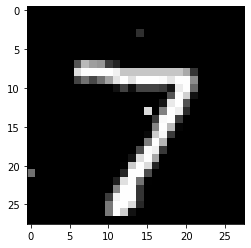

5


3


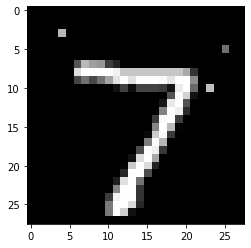

3


2


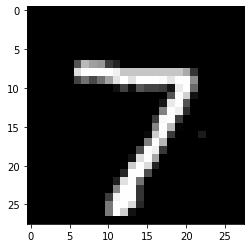

2


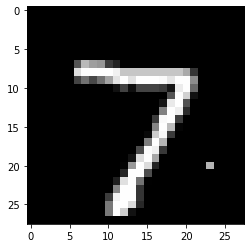

5


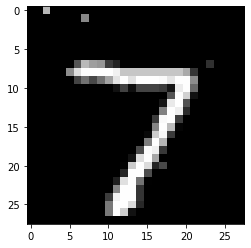

3


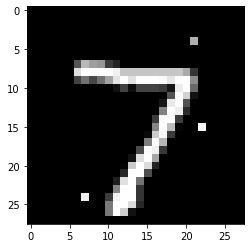

5


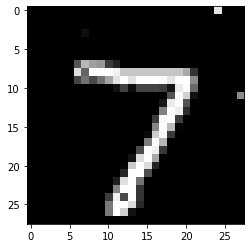

1


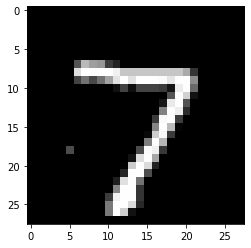

2


3


3


5


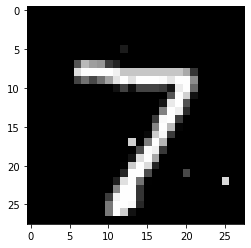

2


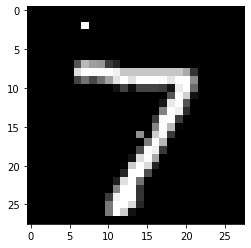

3


3


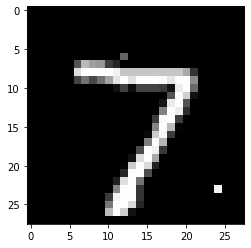

4


3


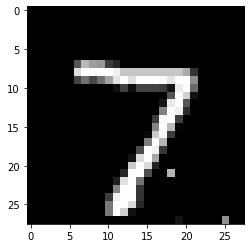

3


2


5


4


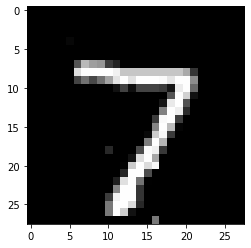

1


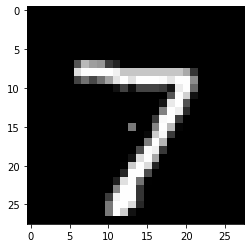

2


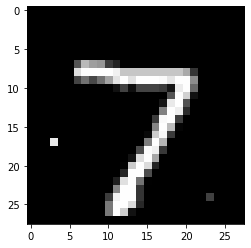

5


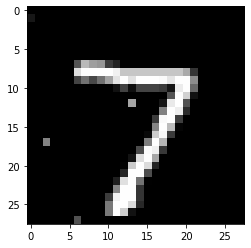

3


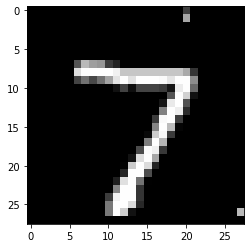

2


5


4


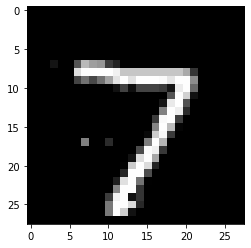

3


2


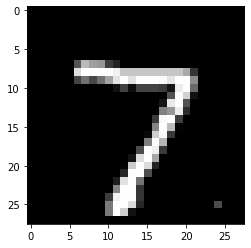

5


3


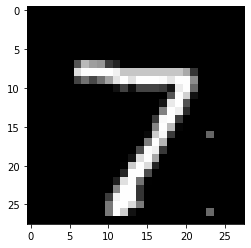

4


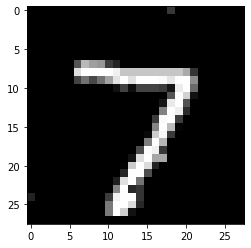

4


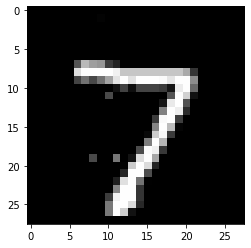

4


5


4


5


1


3


3


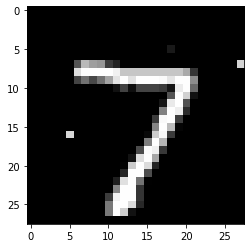

1


5


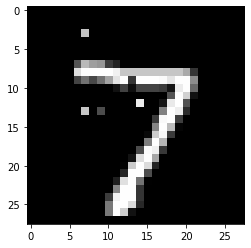

4


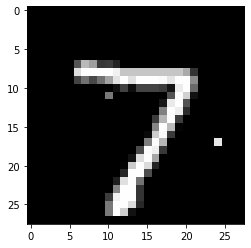

4


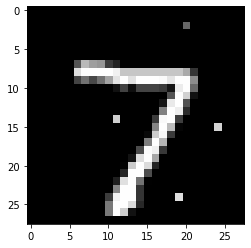

1


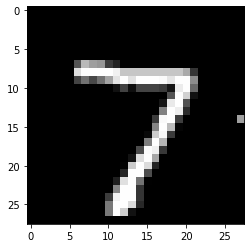

5


1


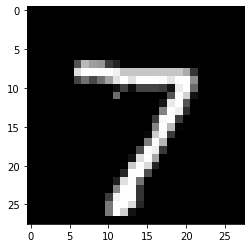

4


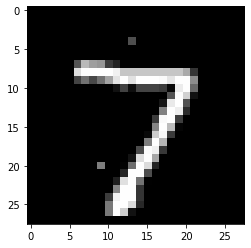

2


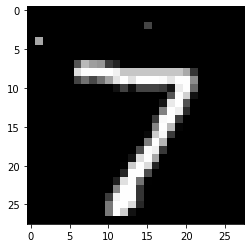

5


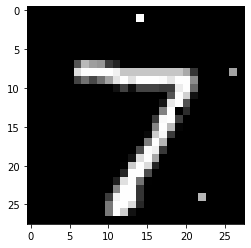

3


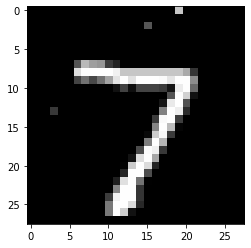

5


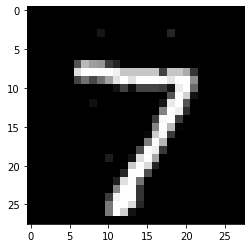

3


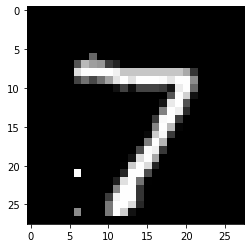

4


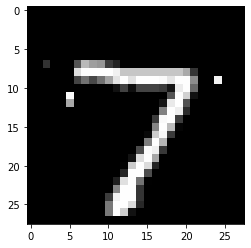

1


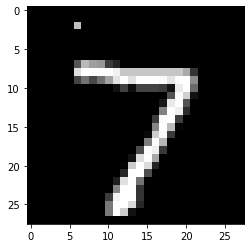

1


5


5


3


3


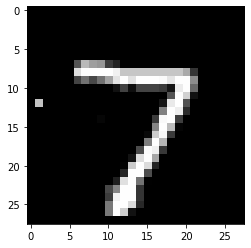

4


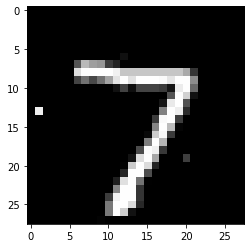

2


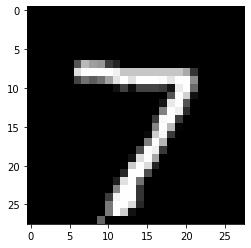

4


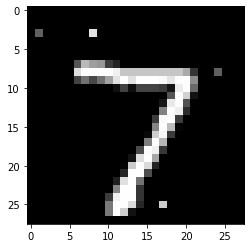

2


1


3


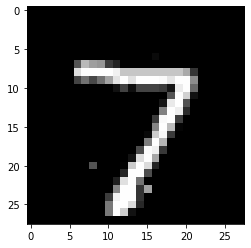

3


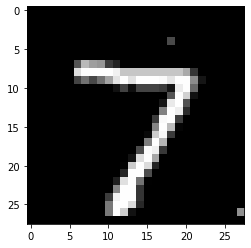

1


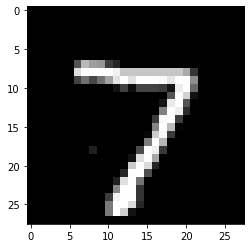

In [4]:
x_des = []
for r in range(100):
    x = []
    y = []
    L = random.randint(1,5)
    for i in range(L):
        x.append(random.randint(0,27))
        y.append(random.randint(0,27))
        x_tmp[x[i],y[i]] = random.randint(0,254)
    x_t = x_tmp/255
    x_des.append(np.array(x_t.reshape(1,784)))
    print(L)
    plt.imshow(x_tmp,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_test[0])

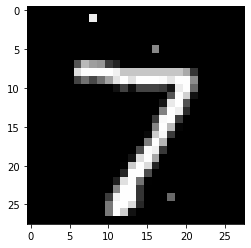

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.93333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
# test
x_des[0] = x_des[0].reshape(28,28)
X = x_des[0]
plt.imshow(X,cmap='gray')
plt.show()
X

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
model = load_model('mnist_model.h5')

In [15]:
# test
X = np.concatenate(x_des, axis=0)
X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.2745098, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [45]:
# test
X = np.array(x_des)
X[9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [7]:
def Func(x):
    result=model.predict(x[:].reshape(1,784))
    return result[0][7]

In [8]:
MAX_GENERATION = 2000  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 100  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
E = 0.15
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:
            if Func(BEST_X) < E:
                print(GENERATION)
                print(BEST_X)
                plt.imshow(BEST_X.reshape(28,28),cmap='gray')
                plt.show()
                break
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 3)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = abs(X[r[2], :] + SIGMA * (X[r[0], :] - X[r[1], :]))
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                # 变异的种子表现更好
                if FITS[i] >= FITS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if FITS_U[i] < Func(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X))
        if GENERATION == MAX_GENERATION:
            print("当前次未能收敛")
        G[k] = GENERATION
       
print("代数：", G)
print("平均代数：", np.mean(G))

最优值： 0.99577713
最优值： 0.99565625
最优值： 0.9954863
最优值： 0.9949444
最优值： 0.994975
最优值： 0.9950009
最优值： 0.99469805
最优值： 0.9948907
最优值： 0.9941757
最优值： 0.9944115
最优值： 0.9940398
最优值： 0.99377394
最优值： 0.99398005
最优值： 0.9928267
最优值： 0.99297875
最优值： 0.991932
最优值： 0.9909965
最优值： 0.990257
最优值： 0.99144113
最优值： 0.9889659
最优值： 0.99079996
最优值： 0.9879879
最优值： 0.985778
最优值： 0.9850093
最优值： 0.98422825
最优值： 0.9852485
最优值： 0.98393345
最优值： 0.9825897
最优值： 0.9831618
最优值： 0.9800852
最优值： 0.978542
最优值： 0.9770329
最优值： 0.9742346
最优值： 0.9745832
最优值： 0.9702524
最优值： 0.96835136
最优值： 0.9602923
最优值： 0.9569254
最优值： 0.95542395
最优值： 0.9571059
最优值： 0.9440947
最优值： 0.92760646
最优值： 0.92834204
最优值： 0.92654955
最优值： 0.9208025
最优值： 0.92855287
最优值： 0.918801
最优值： 0.8814659
最优值： 0.86520046
最优值： 0.8829706
最优值： 0.8460712
最优值： 0.861442
最优值： 0.8507926
最优值： 0.8443374
最优值： 0.82993025
最优值： 0.82657605
最优值： 0.80589473
最优值： 0.82103884
最优值： 0.8089102
最优值： 0.79318374
最优值： 0.7801506
最优值： 0.75112027
最优值： 0.7507132
最优值： 0.70599055
最优值： 0.71616536
最优值： 0.

代数： [112.]
平均代数： 112.0


In [9]:
BEST_X

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.46579213e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71096554e-04, 0.00000000e+00, 4.49506713e-03, 0.00000000e+00,
       5.66382447e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.67657184e-01,
       0.00000000e+00, 0.00000000e+00, 4.19932806e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00360227e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.24139884e-01, 0.00000000e+00, 0.00000000e+00,
       2.90019042e-02, 0.00000000e+00, 2.62874018e-04, 0.00000000e+00,
       0.00000000e+00, 6.64067446e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.15709263e-02, 0.00000000e+00,
       9.40422168e-01, 8.51308850e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.44103733e-03,
      

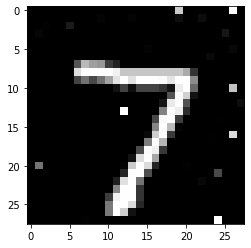

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.         202.616
    0.           0.           0.           0.           0.
    0.         255.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           4.879116
    0.           0.           0.           4.06186407   0.
    0.           0.           0.           0.          13.
    0.           0.          11.988        0.           0.
    0.           0.           0.        ]
 [  0.           0.           2.28941429   0.           0.
   27.42566233   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.   

In [12]:
bes = BEST_X.reshape(28,28)
for x in range(28):
  for y in range(28):
    if bes[x,y]>1:
        bes[x,y] = 1
plt.imshow(bes*255,cmap='gray')
plt.show()
print(bes*255)

In [14]:
result=model.predict(BEST_X.reshape(1,784))
result[0]

array([1.2270408e-04, 4.8461512e-05, 1.4535931e-03, 2.8693033e-03,
       1.9180823e-05, 2.3397243e-04, 9.4624681e-07, 9.9419135e-01,
       9.8625685e-05, 9.6184318e-04], dtype=float32)

In [10]:
for i in range(784):
    if BEST_X[i]>1:
        print(BEST_X[i])

In [55]:
V=[1.175,0.8,1.5,1.32,1.912]
for i in range(5):
                    if V[i] > 1:
                        V[i] =1-(V[i]-1)
                       
V = [round(i,3) for i in V]
V

[0.825, 0.8, 0.5, 0.68, 0.088]